# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [7]:
declare = True
res = []

for noise, noise_string in zip(['none', 'ibm_perth'], ['_', 'ibm_perth']):
    for init in ['uniform', 'beta', 'normal']:
        res_current = []
        for optimizer in ['cobyla', 'spsa', 'neldermead']:
            res_current.append(pd.read_csv('../reports/results/rice_' + noise_string + '_' + optimizer + '_pca_' + init + "_" + 'results.csv', index_col=0))
        res_current = pd.concat(res_current)
        res_current['noise'] = noise
        res_current['initialization'] = init
        res.append(res_current)
res = pd.concat(res)
res.head()

,accuracy,f1,time,ansatz,optimizer,featuremap,entanglement,entanglement_featuremap,iterations,preprocessing,noise,initialization
index,,,,,,,,,,,,
0,0.540,0.468275,1004.087513,<function get_efficientsu2 at 0x7fdf5041ed30>,<function get_cobyla at 0x7fdf1f1a4160>,<function get_zfeaturemap at 0x7fdf575941f0>,full,NaN,194,pca,none,uniform
1,0.548,0.541351,950.573234,<function get_efficientsu2 at 0x7fdf5041ed30>,<function get_cobyla at 0x7fdf1f1a4160>,<function get_zfeaturemap at 0x7fdf575941f0>,linear,NaN,203,pca,none,uniform
2,0.560,0.557000,835.213769,<function get_efficientsu2 at 0x7fdf5041ed30>,<function get_cobyla at 0x7fdf1f1a4160>,<function get_zfeaturemap at 0x7fdf575941f0>,circular,NaN,175,pca,none,uniform
3,0.492,0.380034,878.246817,<function get_efficientsu2 at 0x7fdf5041ed30>,<function get_cobyla at 0x7fdf1f1a4160>,<function get_zfeaturemap at 0x7fdf575941f0>,sca,NaN,185,pca,none,uniform
4,0.548,0.547588,1709.575860,<function get_efficientsu2 at 0x7fdf5041ed30>,<function get_cobyla at 0x7fdf1f1a4160>,<function get_zzfeaturemap at 0x7fdf57594280>,full,full,225,pca,none,uniform


In [8]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [9]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [10]:
# if feature_map contains 'pauli' replace with 'pauli'
res['featuremap'] = res['featuremap'].apply(lambda x: 'pauli' if 'pauli' in x else x)
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [11]:
index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]
worst_configs = res[res['accuracy'] < min(res['accuracy']) + 0.1]

In [12]:
# get absolute difference between noise and no noise
noise = res[res['noise'] == 'ibm_perth'].set_index(index).sort_index()
no_noise = res[res['noise'] == 'none'].set_index(index).sort_index()
diff = np.abs(noise['accuracy'] - no_noise['accuracy'])

In [13]:
most_similar = diff[diff < min(diff) + 0.05].reset_index()
least_similar = diff[diff > max(diff) - 0.05].reset_index()

In [14]:
print("Mean difference between noise and no noise: ", diff.mean())
print("Standard deviation of difference between noise and no noise: ", diff.std())

Mean difference between noise and no noise:  0.03614285714285714
Standard deviation of difference between noise and no noise:  0.03715955523063355


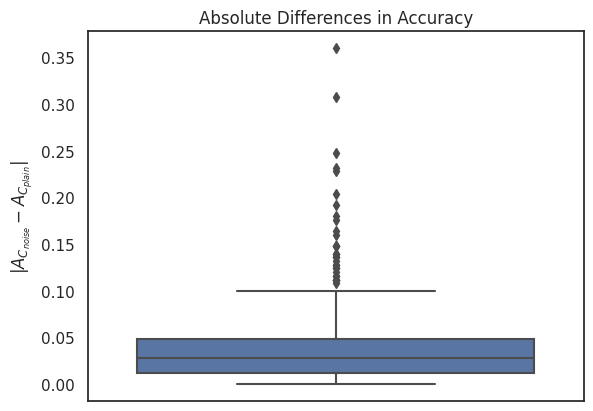

In [15]:
sns.boxplot(diff, palette='deep')
# name x tick of box plot
plt.xticks([0], [''])
plt.ylabel(r'$|{A}_{C_{noise}} - {A}_{C_{plain}}|$')
plt.title('Absolute Differences in Accuracy')
plt.savefig("../reports/figures/kdd_abs_diff.png")
plt.show()

In [16]:
print("Min difference between noise and no noise: ", diff.min())
print("Max difference between noise and no noise: ", diff.max())

Min difference between noise and no noise:  0.0
Max difference between noise and no noise:  0.36


In [17]:
print("Results with noise significantly worse ", wilcoxon(noise['accuracy'], no_noise['accuracy'], alternative='less').pvalue < 0.05)

Results with noise significantly worse  True


## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* COBYLA and Nelder-Mead with an without noise significantly different
* Interestingly, SPSA make up the biggest part of the least similar configurations

In [18]:
res.groupby(['optimizer', 'noise']).agg({"accuracy":[np.mean, np.median, np.std], "f1":[np.mean, np.median, np.std]})

accuracy                         f1                    
                           mean median       std      mean    median       std
optimizer   noise                                                             
cobyla      ibm_perth  0.566444  0.536  0.102228  0.557316  0.528212  0.106411
            none       0.572889  0.536  0.103736  0.565929  0.532203  0.107462
nelder_mead ibm_perth  0.492825  0.508  0.067059  0.483856  0.500244  0.073462
            none       0.501746  0.508  0.061281  0.492138  0.500601  0.067702
spsa        ibm_perth  0.568095  0.532  0.096975  0.556801  0.524450  0.102337
            none       0.578778  0.544  0.104352  0.568743  0.529632  0.109082

In [19]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [20]:
# Wilcoxon
print("Wilcoxon: Cobyla without noise significantly better:", wilcoxon(c.loc[c['noise'] == 'none','accuracy'].sort_index(), c.loc[c['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA without noise significantly better",  wilcoxon(s.loc[s['noise'] == 'none','accuracy'].sort_index(), s.loc[s['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Nelder Mead without noise significantly better:",  wilcoxon(n.loc[n['noise'] == 'none','accuracy'].sort_index(), n.loc[n['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)

Wilcoxon: Cobyla without noise significantly better: True
Wilcoxon: SPSA without noise significantly better True
Wilcoxon: Nelder Mead without noise significantly better: True


In [21]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

,accuracy,f1,time,ansatz,optimizer,featuremap,entanglement,entanglement_featuremap,iterations,preprocessing,noise,initialization
0,0.916,0.915695,612.255934,two_local,cobyla,z,pairwise,NaN,152,pca,none,beta
1,0.908,0.907844,7470.938699,pauli_two_design,spsa,z,NaN,NaN,201,pca,ibm_perth,beta
2,0.904,0.902871,1411.702989,real_amplitudes,spsa,z,linear,NaN,351,pca,none,beta
3,0.900,0.899086,668.402732,real_amplitudes,cobyla,z,circular,NaN,163,pca,none,beta
4,0.896,0.895563,688.358308,real_amplitudes,cobyla,z,sca,NaN,167,pca,none,beta


In [22]:
most_similar.value_counts(['optimizer'])/res.value_counts(['optimizer'])

optimizer  
cobyla         0.380952
nelder_mead    0.384921
spsa           0.376984
Name: count, dtype: float64

In [23]:
least_similar.value_counts(['optimizer'])/res.value_counts(['optimizer'])

optimizer  
cobyla              NaN
nelder_mead    0.001984
spsa                NaN
Name: count, dtype: float64

## Ansatz
We now consider the ansatz parameter alone.
* All ansatzes, except PauliTwoDesign, perform signficantly different with and without noise
* None of the Pauli configurations are among the least similar ones
* Other than that, comparable ratios in the most similar ones

In [24]:
res.groupby(['ansatz', 'noise']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
ansatz           noise                                            
efficient_su2    ibm_perth  0.546222  0.099252  0.538641  0.101660
                 none       0.557019  0.097661  0.548758  0.102044
pauli_two_design ibm_perth  0.546963  0.103009  0.539767  0.109644
                 none       0.548370  0.117080  0.543707  0.118517
real_amplitudes  ibm_perth  0.540833  0.093509  0.530107  0.098533
                 none       0.548648  0.094940  0.537990  0.100070
two_local        ibm_perth  0.539837  0.095956  0.528490  0.101340
                 none       0.548978  0.097893  0.540217  0.102679

In [25]:
e = res[res['ansatz'] == 'efficient_su2'].set_index(index)
p = res[res['ansatz'] == 'pauli_two_design'].set_index(index)
r = res[res['ansatz'] == 'real_amplitudes'].set_index(index)
t = res[res['ansatz'] == 'two_local'].set_index(index)

In [26]:
# Wilcoxon
print("Wilcoxon: EfficientSU2 without noise significantly better", wilcoxon(e.loc[e['noise'] == 'none','accuracy'], e.loc[e['noise'] != 'none', 'accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: PauliTwoDesign without noise significantly better:",  wilcoxon(s.loc[s['noise'] == 'none','accuracy'], s.loc[s['noise'] != 'none', 'accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: RealAmplitudes without noise significantly better:",  wilcoxon(r.loc[r['noise'] == 'none','accuracy'], r.loc[r['noise'] != 'none', 'accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: TwoLocal without noise significantly better:",  wilcoxon(t.loc[t['noise'] == 'none','accuracy'], t.loc[t['noise'] != 'none', 'accuracy'], alternative='greater').pvalue < 0.05)

Wilcoxon: EfficientSU2 without noise significantly better True
Wilcoxon: PauliTwoDesign without noise significantly better: True
Wilcoxon: RealAmplitudes without noise significantly better: True
Wilcoxon: TwoLocal without noise significantly better: True


In [27]:
most_similar.value_counts(['ansatz'])/res.value_counts(['ansatz'])

ansatz          
efficient_su2       0.372685
pauli_two_design    0.416667
real_amplitudes     0.395833
two_local           0.368519
Name: count, dtype: float64

In [28]:
least_similar.value_counts(['ansatz'])/res.value_counts(['ansatz'])

ansatz          
efficient_su2            NaN
pauli_two_design    0.009259
real_amplitudes          NaN
two_local                NaN
Name: count, dtype: float64

## Ansatz Entanglement
* Circular, full and linear entanglement with and without noise are significantly different
* Does not apply for pairwise and sca
* Still, no full configurations are among the least similar ones
* Pairwise has the biggest ratio among the least similar configs

In [29]:
res.groupby(['entanglement', 'noise']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                            mean median       std      mean    median   
entanglement noise                                                      
circular     ibm_perth  0.531654  0.508  0.088196  0.525175  0.504009  \
             none       0.546494  0.520  0.092593  0.540129  0.512483   
full         ibm_perth  0.549926  0.540  0.101832  0.533607  0.532180   
             none       0.557457  0.540  0.096845  0.542166  0.536238   
linear       ibm_perth  0.546049  0.524  0.100968  0.538697  0.519872   
             none       0.555457  0.532  0.104916  0.548850  0.526995   
pairwise     ibm_perth  0.546074  0.534  0.114188  0.539982  0.528071   
             none       0.556889  0.528  0.097917  0.548806  0.524015   
sca          ibm_perth  0.539481  0.520  0.086109  0.528342  0.511339   
             none       0.544148  0.516  0.092686  0.535278  0.511968   

                                  
                             std  
entanglement noise                
circular     ibm_perth  0.090184  
             none       0.093401  
full         ibm_perth  0.111021  
             none       0.107962  
linear       ibm_perth  0.104632  
             none       0.108076  
pairwise     ibm_perth  0.115231  
             none       0.103861  
sca          ibm_perth  0.090016  
             none       0.096224

In [30]:
c = res[res['entanglement'] == 'circular'].set_index(index)
f = res[res['entanglement'] == 'full'].set_index(index)
l = res[res['entanglement'] == 'linear'].set_index(index)
p = res[res['entanglement'] == 'pairwise'].set_index(index)
s = res[res['entanglement'] == 'sca'].set_index(index)

In [31]:
# Wilcoxon
print("Wilcoxon: Circular without noise significantly better:", wilcoxon(c.loc[c['noise'] == 'none','accuracy'].sort_index(), c.loc[c['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Full without noise significantly different:",  wilcoxon(f.loc[f['noise'] == 'none','accuracy'].sort_index(), f.loc[f['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: Linear without noise significantly better:",  wilcoxon(l.loc[l['noise'] == 'none','accuracy'].sort_index(), l.loc[l['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Pairwise without noise significantly different:",  wilcoxon(p.loc[p['noise'] == 'none','accuracy'].sort_index(), p.loc[p['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: Sca without noise significantly different:",  wilcoxon(s.loc[s['noise'] == 'none','accuracy'].sort_index(), s.loc[s['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: Circular without noise significantly better: True
Wilcoxon: Full without noise significantly different: False
Wilcoxon: Linear without noise significantly better: True
Wilcoxon: Pairwise without noise significantly different: False
Wilcoxon: Sca without noise significantly different: False


In [32]:
most_similar.value_counts(['entanglement'])/res.value_counts(['entanglement'])

entanglement
circular        0.351852
full            0.432099
linear          0.379630
pairwise        0.388889
sca             0.345679
Name: count, dtype: float64

In [33]:
least_similar.value_counts(['entanglement'])/res.value_counts(['entanglement'])

entanglement
circular       NaN
full           NaN
linear         NaN
sca            NaN
pairwise       NaN
Name: count, dtype: float64

## Ansatz combined with ansatz entanglement
* RealAmplitudes full is significantly different
* TwoLocal linear is significantly different
* No clear patterns alltogether

In [34]:
res.groupby(['ansatz', 'entanglement', 'noise']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1   
                                            mean median       std      mean   
ansatz          entanglement noise                                            
efficient_su2   circular     ibm_perth  0.546889  0.520  0.094509  0.537817  \
                             none       0.565111  0.540  0.091572  0.558639   
                full         ibm_perth  0.545259  0.536  0.105952  0.537719   
                             none       0.553926  0.536  0.098639  0.542649   
                linear       ibm_perth  0.550296  0.528  0.109474  0.544088   
                             none       0.553852  0.526  0.109915  0.549368   
                sca          ibm_perth  0.542444  0.520  0.088238  0.534938   
                             none       0.555185  0.518  0.091674  0.544377   
real_amplitudes circular     ibm_perth  0.528222  0.508  0.084451  0.523708   
                             none       0.534667  0.512  0.086606  0.528061   
                full         ibm_perth  0.549407  0.538  0.098634  0.529334   
                             none       0.565926  0.544  0.093107  0.546194   
                linear       ibm_perth  0.542815  0.520  0.104237  0.536689   
                             none       0.556074  0.536  0.106403  0.549011   
                sca          ibm_perth  0.542889  0.518  0.086601  0.530698   
                             none       0.537926  0.516  0.091636  0.528696   
two_local       circular     ibm_perth  0.519852  0.504  0.084703  0.514001   
                             none       0.539704  0.508  0.098056  0.533689   
                full         ibm_perth  0.555111  0.546  0.102452  0.533767   
                             none       0.552519  0.542  0.099908  0.537655   
                linear       ibm_perth  0.545037  0.528  0.089935  0.535313   
                             none       0.556444  0.530  0.100151  0.548173   
                pairwise     ibm_perth  0.546074  0.534  0.114188  0.539982   
                             none       0.556889  0.528  0.097917  0.548806   
                sca          ibm_perth  0.533111  0.518  0.084712  0.519388   
                             none       0.539333  0.516  0.095435  0.532761   

                                                            
                                          median       std  
ansatz          entanglement noise                          
efficient_su2   circular     ibm_perth  0.512306  0.097716  
                             none       0.532082  0.092306  
                full         ibm_perth  0.533989  0.108077  
                             none       0.530027  0.107585  
                linear       ibm_perth  0.523870  0.112691  
                             none       0.526437  0.111241  
                sca          ibm_perth  0.517387  0.089164  
                             none       0.514743  0.098054  
real_amplitudes circular     ibm_perth  0.501627  0.084351  
                             none       0.500242  0.086737  
                full         ibm_perth  0.529253  0.111369  
                             none       0.536878  0.107483  
                linear       ibm_perth  0.513778  0.106895  
                             none       0.527326  0.110928  
                sca          ibm_perth  0.508027  0.091396  
                             none       0.506392  0.094133  
two_local       circular     ibm_perth  0.502625  0.088037  
                             none       0.505217  0.099584  
                full         ibm_perth  0.531165  0.115423  
                             none       0.537570  0.110646  
                linear       ibm_perth  0.520207  0.095319  
                             none       0.526505  0.103931  
                pairwise     ibm_perth  0.528071  0.115231  
                             none       0.524015  0.103861  
                sca          ibm_perth  0.506392  0.090438  
                             none       

In [35]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index)
    e_f = e[e['entanglement'] == 'full'].set_index(index)
    e_l = e[e['entanglement'] == 'linear'].set_index(index)
    e_s = e[e['entanglement'] == 'sca'].set_index(index)

    # Wilcoxon
    print(ansatz, "Wilcoxon: Circular with and without noise significantly different:", wilcoxon(e_c.loc[e_c['noise'] == 'none','accuracy'].sort_index(), e_c.loc[e_c['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
    print(ansatz, "Wilcoxon: Full with and without noise significantly different:",  wilcoxon(e_f.loc[e_f['noise'] == 'none','accuracy'].sort_index(), e_f.loc[e_f['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
    print(ansatz, "Wilcoxon: Linear with and without noise significantly different:",  wilcoxon(e_l.loc[e_l['noise'] == 'none','accuracy'].sort_index(), e_l.loc[e_l['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
    print(ansatz, "Wilcoxon: Sca with and without noise significantly different:",  wilcoxon(e_s.loc[e_s['noise'] == 'none','accuracy'].sort_index(), e_s.loc[e_s['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()
        print(ansatz, "Wilcoxon: Pairwise with and without noise significantly different:",  wilcoxon(e_p.loc[e_p['noise'] == 'none','accuracy'].sort_index(), e_p.loc[e_p['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

efficient_su2 Wilcoxon: Circular with and without noise significantly different: False
efficient_su2 Wilcoxon: Full with and without noise significantly different: False
efficient_su2 Wilcoxon: Linear with and without noise significantly different: False
efficient_su2 Wilcoxon: Sca with and without noise significantly different: False
real_amplitudes Wilcoxon: Circular with and without noise significantly different: False
real_amplitudes Wilcoxon: Full with and without noise significantly different: False
real_amplitudes Wilcoxon: Linear with and without noise significantly different: False
real_amplitudes Wilcoxon: Sca with and without noise significantly different: False
two_local Wilcoxon: Circular with and without noise significantly different: True
two_local Wilcoxon: Full with and without noise significantly different: False
two_local Wilcoxon: Linear with and without noise significantly different: False
two_local Wilcoxon: Sca with and without noise significantly different: Fals

In [36]:
most_similar.value_counts(['ansatz', 'entanglement'])/res.value_counts(['ansatz', 'entanglement'])

ansatz           entanglement
efficient_su2    circular        0.296296
                 full            0.435185
                 linear          0.416667
                 sca             0.342593
real_amplitudes  circular        0.407407
                 full            0.425926
                 linear          0.388889
                 sca             0.361111
two_local        circular        0.351852
                 full            0.435185
                 linear          0.333333
                 pairwise        0.388889
                 sca             0.333333
Name: count, dtype: float64

In [37]:
least_similar.value_counts(['ansatz', 'entanglement'])/res.value_counts(['ansatz', 'entanglement'])

ansatz           entanglement
efficient_su2    circular       NaN
                 full           NaN
                 linear         NaN
                 sca            NaN
real_amplitudes  circular       NaN
                 full           NaN
                 linear         NaN
                 sca            NaN
two_local        circular       NaN
                 full           NaN
                 linear         NaN
                 pairwise       NaN
                 sca            NaN
Name: count, dtype: float64

## Feature Map
* ZFeatureMap not significantly different with and without noise
* ZZFeatureMap is significantly different with and without noise
* But ZFeatureMap configuration are a lot more represented in the least similar configurations

In [38]:
res.groupby(['featuremap', 'noise']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                          mean median       std      mean    median       std
featuremap noise                                                             
z          ibm_perth  0.566794  0.514  0.176972  0.536244  0.480098  0.190941
           none       0.580540  0.528  0.172965  0.548142  0.480941  0.190503
zz         ibm_perth  0.537587  0.526  0.069511  0.531941  0.521090  0.070951
           none       0.545257  0.528  0.073878  0.541096  0.524450  0.074006

In [39]:
z = res[res['featuremap'] == 'z'].set_index(index)
zz = res[res['featuremap'] == 'zz'].set_index(index)

In [40]:
# Wilcoxon
print("Wilcoxon: ZFeatureMap without noise significantly better:",  wilcoxon(z.loc[z['noise'] == 'none','accuracy'].sort_index(), z.loc[z['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: ZZFeatureMap without noise significantly better:",  wilcoxon(zz.loc[zz['noise'] == 'none','accuracy'].sort_index(), zz.loc[zz['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)

Wilcoxon: ZFeatureMap without noise significantly better: True
Wilcoxon: ZZFeatureMap without noise significantly better: True


In [41]:
most_similar.value_counts(['featuremap'])/res.value_counts(['featuremap'])

featuremap
zz            0.384921
z             0.361111
Name: count, dtype: float64

In [42]:
least_similar.value_counts(['featuremap'])/res.value_counts(['featuremap'])

featuremap
z             0.003968
zz                 NaN
Name: count, dtype: float64

## Feature Entanglement
* Circular, full, pairwise and sca are significantly different with and without noise
* Linear and None (ZFeatureMap) are not
* circular, full and pairwise not among least similar configs
* Also none (ZFeatureMap) less represented in most similar configs

In [43]:
res.groupby(['entanglement_featuremap', 'noise'], dropna=False).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1   
                                       mean median       std      mean   
entanglement_featuremap noise                                            
circular                ibm_perth  0.537302  0.532  0.066839  0.534549  \
                        none       0.543714  0.532  0.074588  0.541105   
full                    ibm_perth  0.530667  0.528  0.059248  0.527456   
                        none       0.545587  0.536  0.068552  0.543640   
linear                  ibm_perth  0.542127  0.520  0.075417  0.532606   
                        none       0.547746  0.520  0.077391  0.540416   
pairwise                ibm_perth  0.540603  0.520  0.078674  0.530047   
                        none       0.544698  0.518  0.079264  0.538620   
sca                     ibm_perth  0.537238  0.536  0.066184  0.535045   
                        none       0.544540  0.532  0.070140  0.541699   
NaN                     ibm_perth  0.566794  0.514  0.176972  0.536244   
                        none       0.580540  0.528  0.172965  0.548142   

                                                       
                                     median       std  
entanglement_featuremap noise                          
circular                ibm_perth  0.531182  0.066586  
                        none       0.531993  0.074028  
full                    ibm_perth  0.526033  0.059380  
                        none       0.534754  0.068314  
linear                  ibm_perth  0.512093  0.079646  
                        none       0.515370  0.078718  
pairwise                ibm_perth  0.508307  0.081697  
                        none       0.511455  0.079377  
sca                     ibm_perth  0.536282  0.065672  
                        none       0.531742  0.070016  
NaN                     ibm_perth  0.480098  0.190941  
                        none       0.480941  0.190503

In [44]:
c = res[res['entanglement_featuremap'] == 'circular'].set_index(index)
f = res[res['entanglement_featuremap'] == 'full'].set_index(index)
l = res[res['entanglement_featuremap'] == 'linear'].set_index(index)
p = res[res['entanglement_featuremap'] == 'pairwise'].set_index(index)
s = res[res['entanglement_featuremap'] == 'sca'].set_index(index)
n = res[res['entanglement_featuremap'].isna()].set_index(index)

# Wilcoxon
print("Wilcoxon: Circular without noise significantly better:", wilcoxon(c.loc[c['noise'] == 'none','accuracy'].sort_index(), c.loc[c['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Full without noise significantly better:",  wilcoxon(f.loc[f['noise'] == 'none','accuracy'].sort_index(), f.loc[f['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Linear without noise significantly different:",  wilcoxon(l.loc[l['noise'] == 'none','accuracy'].sort_index(), l.loc[l['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: Pairwise without noise significantly different:",  wilcoxon(p.loc[p['noise'] == 'none','accuracy'].sort_index(), p.loc[p['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: Sca without noise significantly different:",  wilcoxon(s.loc[s['noise'] == 'none','accuracy'].sort_index(), s.loc[s['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: None without noise significantly better:",  wilcoxon(n.loc[n['noise'] == 'none','accuracy'].sort_index(), n.loc[n['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)

Wilcoxon: Circular without noise significantly better: True
Wilcoxon: Full without noise significantly better: True
Wilcoxon: Linear without noise significantly different: False
Wilcoxon: Pairwise without noise significantly different: False
Wilcoxon: Sca without noise significantly different: False
Wilcoxon: None without noise significantly better: True


In [45]:
most_similar.value_counts(['entanglement_featuremap'], dropna=False)/res.value_counts(['entanglement_featuremap'], dropna=False)

entanglement_featuremap
circular                   0.400794
full                       0.345238
linear                     0.408730
pairwise                   0.404762
sca                        0.365079
NaN                        0.361111
Name: count, dtype: float64

In [46]:
least_similar.value_counts(['entanglement_featuremap'], dropna=False)/res.value_counts(['entanglement_featuremap'], dropna=False)

entanglement_featuremap
circular                        NaN
full                            NaN
linear                          NaN
pairwise                        NaN
sca                             NaN
NaN                        0.003968
Name: count, dtype: float64

## Ansatz and feature map
* EfficientSU2 ansatz with both feature maps is significantly different
* PauliTwoDesign, RealAmplitudes and TwoLocal only with ZZFeatureMap significantly different
* Otherwise no new patterns

In [47]:
res.groupby(['ansatz', 'featuremap', 'noise']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1   
                                           mean median       std      mean   
ansatz           featuremap noise                                            
efficient_su2    z          ibm_perth  0.572889  0.520  0.173970  0.543935  \
                            none       0.578444  0.538  0.165354  0.547955   
                 zz         ibm_perth  0.540889  0.524  0.075780  0.537582   
                            none       0.552733  0.532  0.077453  0.548919   
pauli_two_design z          ibm_perth  0.568000  0.496  0.190053  0.536808   
                            none       0.538667  0.500  0.241089  0.522859   
                 zz         ibm_perth  0.542756  0.532  0.078137  0.540359   
                            none       0.550311  0.540  0.076944  0.547876   
real_amplitudes  z          ibm_perth  0.571111  0.518  0.174629  0.541653   
                            none       0.589556  0.530  0.168479  0.552688   
                 zz         ibm_perth  0.534778  0.524  0.065716  0.527798   
                            none       0.540467  0.528  0.069803  0.535051   
two_local        z          ibm_perth  0.558222  0.512  0.184266  0.525652   
                            none       0.583378  0.528  0.172215  0.549711   
                 zz         ibm_perth  0.536160  0.528  0.065622  0.529058   
                            none       0.542098  0.528  0.073465  0.538318   

                                                           
                                         median       std  
ansatz           featuremap noise                          
efficient_su2    z          ibm_perth  0.488878  0.186912  
                            none       0.487343  0.182841  
                 zz         ibm_perth  0.523717  0.074669  
                            none       0.529927  0.077268  
pauli_two_design z          ibm_perth  0.467395  0.214125  
                            none       0.466019  0.244465  
                 zz         ibm_perth  0.531873  0.078373  
                            none       0.540405  0.077114  
real_amplitudes  z          ibm_perth  0.486066  0.188372  
                            none       0.478532  0.189898  
                 zz         ibm_perth  0.515930  0.068491  
                            none       0.519180  0.070177  
two_local        z          ibm_perth  0.463512  0.197575  
                            none       0.479373  0.191851  
                 zz         ibm_perth  0.521090  0.068289  
                            none       0.524480  0.073548

In [48]:
for ansatz in pd.unique(res['ansatz']):
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index)
    zz = f[f['featuremap'] == 'zz'].set_index(index)

    # Wilcoxon
    print(f"Wilcoxon: ZFeaturemap with {ansatz} with and without noise significantly different:",  wilcoxon(z.loc[z['noise'] == 'none','accuracy'].sort_index(), z.loc[z['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
    print(f"Wilcoxon: ZZFeatureMap with {ansatz} with and without noise significantly different:",  wilcoxon(zz.loc[zz['noise'] == 'none','accuracy'].sort_index(), zz.loc[zz['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: ZFeaturemap with two_local with and without noise significantly different: True
Wilcoxon: ZZFeatureMap with two_local with and without noise significantly different: False
Wilcoxon: ZFeaturemap with pauli_two_design with and without noise significantly different: False
Wilcoxon: ZZFeatureMap with pauli_two_design with and without noise significantly different: False
Wilcoxon: ZFeaturemap with real_amplitudes with and without noise significantly different: False
Wilcoxon: ZZFeatureMap with real_amplitudes with and without noise significantly different: False
Wilcoxon: ZFeaturemap with efficient_su2 with and without noise significantly different: False
Wilcoxon: ZZFeatureMap with efficient_su2 with and without noise significantly different: True


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculati

In [49]:
most_similar.value_counts(['ansatz', 'featuremap'], dropna=False)/res.value_counts(['ansatz', 'featuremap'], dropna=False)

ansatz            featuremap
efficient_su2     z             0.361111
                  zz            0.375000
pauli_two_design  z             0.333333
                  zz            0.433333
real_amplitudes   z             0.388889
                  zz            0.397222
two_local         z             0.344444
                  zz            0.373333
Name: count, dtype: float64

In [50]:
least_similar.value_counts(['ansatz', 'featuremap'], dropna=False)/res.value_counts(['ansatz', 'featuremap'], dropna=False)

ansatz            featuremap
efficient_su2     z                  NaN
                  zz                 NaN
pauli_two_design  z             0.055556
                  zz                 NaN
real_amplitudes   z                  NaN
                  zz                 NaN
two_local         z                  NaN
                  zz                 NaN
Name: count, dtype: float64

## Ansatz and Featuremap Entanglement
* circular ansatz: full and pairwise feature entanglement significantly different
* full ansatz: full, pairwise and sca feature entanglement significantly different
* linear ansatz: circular feature entanglement significantly different

In [51]:
res.groupby(['entanglement', 'entanglement_featuremap', 'noise'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1   
                                                    mean       std      mean   
entanglement entanglement_featuremap noise                                     
circular     circular                ibm_perth  0.517926  0.068795  0.515773  \
                                     none       0.534074  0.073884  0.532061   
             full                    ibm_perth  0.505185  0.034513  0.504349   
                                     none       0.533333  0.060072  0.531712   
             linear                  ibm_perth  0.527407  0.069651  0.526188   
...                                                  ...       ...       ...   
NaN          pairwise                none       0.552000  0.104976  0.549139   
             sca                     ibm_perth  0.536000  0.077537  0.534174   
                                     none       0.550667  0.045695  0.546617   
             NaN                     ibm_perth  0.568000  0.190053  0.536808   
                                     none       0.538667  0.241089  0.522859   

                                                          
                                                     std  
entanglement entanglement_featuremap noise                
circular     circular                ibm_perth  0.068204  
                                     none       0.071792  
             full                    ibm_perth  0.034901  
                                     none       0.059646  
             linear                  ibm_perth  0.067881  
...                                                  ...  
NaN          pairwise                none       0.105503  
             sca                     ibm_perth  0.076757  
                                     none       0.048863  
             NaN                     ibm_perth  0.214125  
                                     none       0.244465  

[72 rows x 4 columns]

In [52]:
for entanglement in pd.unique(res['entanglement']):
    f = res[res['entanglement'] == entanglement]
    f_c = f[f['entanglement_featuremap'] == 'circular'].set_index(index)
    f_f = f[f['entanglement_featuremap'] == 'full'].set_index(index)
    f_l = f[f['entanglement_featuremap'] == 'linear'].set_index(index)
    f_p = f[f['entanglement_featuremap'] == 'pairwise'].set_index(index)
    f_s = f[f['entanglement_featuremap'] == 'sca'].set_index(index)
    f_n = f[f['entanglement_featuremap'].isna()].set_index(index)

    # Wilcoxon
    sign = wilcoxon(f_c.loc[f_c['noise'] == 'none','accuracy'].sort_index(), f_c.loc[f_c['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: Circular with and without noise significantly different:", sign)
    sign = wilcoxon(f_f.loc[f_f['noise'] == 'none','accuracy'].sort_index(), f_f.loc[f_f['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: Full with and without noise significantly different:",  sign)
    sign = wilcoxon(f_l.loc[f_l['noise'] == 'none','accuracy'].sort_index(), f_l.loc[f_l['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: Linear with and without noise significantly different:",  sign)
    sign = wilcoxon(f_p.loc[f_p['noise'] == 'none','accuracy'].sort_index(), f_p.loc[f_p['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: Pairwise with and without noise significantly different:", sign)
    sign = wilcoxon(f_s.loc[f_s['noise'] == 'none','accuracy'].sort_index(), f_s.loc[f_s['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: Sca with and without noise significantly different:", sign)
    sign = wilcoxon(f_n.loc[f_n['noise'] == 'none','accuracy'].sort_index(), f_n.loc[f_n['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05
    if sign:
        print(entanglement, "Wilcoxon: None with and without noise significantly different:",  sign)

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


pairwise Wilcoxon: None with and without noise significantly different: True


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


circular Wilcoxon: Full with and without noise significantly different: True
circular Wilcoxon: None with and without noise significantly different: True
sca Wilcoxon: Circular with and without noise significantly different: True


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [53]:
most_similar.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)/res.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)

/tmp/ipykernel_17364/2604937104.py:1: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  most_similar.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)/res.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)


entanglement  entanglement_featuremap
full          linear                     0.481481
              pairwise                   0.481481
              circular                   0.481481
linear        pairwise                   0.444444
              linear                     0.425926
full          NaN                        0.407407
              full                       0.407407
circular      circular                   0.388889
sca           linear                     0.388889
circular      pairwise                   0.388889
              sca                        0.370370
linear        circular                   0.370370
sca           pairwise                   0.370370
linear        NaN                        0.370370
sca           sca                        0.370370
linear        sca                        0.351852
circular      full                       0.333333
sca           NaN                        0.333333
              circular                   0.333333
full        

In [54]:
least_similar.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)/res.value_counts(['entanglement', 'entanglement_featuremap'], dropna=False)

entanglement  entanglement_featuremap
circular      circular                        NaN
              full                            NaN
              linear                          NaN
              pairwise                        NaN
              sca                             NaN
              NaN                             NaN
full          circular                        NaN
              full                            NaN
              linear                          NaN
              pairwise                        NaN
              sca                             NaN
              NaN                             NaN
linear        circular                        NaN
              full                            NaN
              linear                          NaN
              pairwise                        NaN
              sca                             NaN
              NaN                             NaN
pairwise      circular                        NaN
            

## Initialization

In [55]:
res.groupby(['initialization', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                              mean       std      mean       std
initialization noise                                            
beta           ibm_perth  0.603095  0.141942  0.593258  0.148334
               none       0.622016  0.139128  0.612551  0.146389
normal         ibm_perth  0.510683  0.033867  0.500611  0.039997
               none       0.514825  0.031183  0.507529  0.034616
uniform        ibm_perth  0.513587  0.035010  0.504104  0.040500
               none       0.516571  0.034654  0.506731  0.041862

In [56]:
r = res[res['initialization']=='uniform'].set_index(index)
b = res[res['initialization']=='beta'].set_index(index)
n = res[res['initialization']=='normal'].set_index(index)

In [57]:
print("Wilcoxon: Uniform without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)
print("Wilcoxon: Beta without noise significantly better:",  wilcoxon(b.loc[b['noise'] == 'none','accuracy'].sort_index(), b.loc[b['noise'] != 'none', 'accuracy'].sort_index(), alternative='greater').pvalue < 0.05)
print("Wilcoxon: Normal without noise significantly different:",  wilcoxon(n.loc[n['noise'] == 'none','accuracy'].sort_index(), n.loc[n['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: Uniform without noise significantly different: False
Wilcoxon: Beta without noise significantly better: True
Wilcoxon: Normal without noise significantly different: False


In [58]:
most_similar.value_counts(['initialization'], dropna=False)/res.value_counts(['initialization'], dropna=False)

initialization
beta              0.319444
normal            0.414683
uniform           0.408730
Name: count, dtype: float64

In [59]:
least_similar.value_counts(['initialization'], dropna=False)/res.value_counts(['initialization'], dropna=False)


initialization
beta              0.001984
normal                 NaN
uniform                NaN
Name: count, dtype: float64

### Initialization X Optimizer

In [60]:
res.groupby(['initialization', 'optimizer', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                          mean       std      mean       std
initialization optimizer   noise                                            
beta           cobyla      ibm_perth  0.673667  0.107551  0.668802  0.109064
                           none       0.686095  0.104592  0.681996  0.106119
               nelder_mead ibm_perth  0.460048  0.097036  0.441665  0.102514
                           none       0.481619  0.091825  0.462808  0.098665
               spsa        ibm_perth  0.675571  0.094233  0.669307  0.096173
                           none       0.698333  0.095739  0.692848  0.098540
normal         cobyla      ibm_perth  0.509381  0.035666  0.495936  0.045017
                           none       0.514143  0.031566  0.507777  0.034729
               nelder_mead ibm_perth  0.509000  0.035991  0.505301  0.039074
                           none       0.512286  0.033940  0.507439  0.037186
               spsa        ibm_perth  0.513667  0.029793  0.500597  0.035214
                           none       0.518048  0.027834  0.507370  0.032166
uniform        cobyla      ibm_perth  0.516286  0.035884  0.507211  0.037266
                           none       0.518429  0.033799  0.508014  0.044767
               nelder_mead ibm_perth  0.509429  0.035450  0.504603  0.039767
                           none       0.511333  0.034020  0.506168  0.037904
               spsa        ibm_perth  0.515048  0.033694  0.500499  0.044350
                           none       0.519952  0.035903  0.506012  0.043084

In [61]:
for init in pd.unique(res['initialization']):
    for optimizer in pd.unique(res['optimizer']):
        r = res[res['initialization']==init]
        r = r[r['optimizer']==optimizer]
        r = r.set_index(index)
        print(f"Wilcoxon: {init} {optimizer} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta cobyla with and without noise significantly different: False
Wilcoxon: beta spsa with and without noise significantly different: True
Wilcoxon: beta nelder_mead with and without noise significantly different: True
Wilcoxon: uniform cobyla with and without noise significantly different: False
Wilcoxon: uniform spsa with and without noise significantly different: False
Wilcoxon: uniform nelder_mead with and without noise significantly different: False
Wilcoxon: normal cobyla with and without noise significantly different: False
Wilcoxon: normal spsa with and without noise significantly different: False
Wilcoxon: normal nelder_mead with and without noise significantly different: False


In [62]:
most_similar.value_counts(['initialization', 'optimizer'])/res.value_counts(['initialization', 'optimizer'])

initialization  optimizer  
beta            cobyla         0.339286
                nelder_mead    0.279762
                spsa           0.339286
normal          cobyla         0.380952
                nelder_mead    0.422619
                spsa           0.440476
uniform         cobyla         0.422619
                nelder_mead    0.452381
                spsa           0.351190
Name: count, dtype: float64

In [63]:
least_similar.value_counts(['initialization', 'optimizer'])/res.value_counts(['initialization', 'optimizer'])

initialization  optimizer  
beta            cobyla              NaN
                nelder_mead    0.005952
                spsa                NaN
normal          cobyla              NaN
                nelder_mead         NaN
                spsa                NaN
uniform         cobyla              NaN
                nelder_mead         NaN
                spsa                NaN
Name: count, dtype: float64

### Initialization X Ansatz

In [64]:
res.groupby(['initialization', 'ansatz', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1   
                                               mean       std      mean   
initialization ansatz           noise                                     
beta           efficient_su2    ibm_perth  0.614278  0.143014  0.603891  \
                                none       0.635667  0.132445  0.625286   
               pauli_two_design ibm_perth  0.619778  0.146703  0.606851   
                                none       0.606000  0.186688  0.601786   
               real_amplitudes  ibm_perth  0.595889  0.140367  0.588027   
                                none       0.618000  0.132936  0.607218   
               two_local        ibm_perth  0.596578  0.142944  0.586218   
                                none       0.617511  0.140017  0.608781   
normal         efficient_su2    ibm_perth  0.512000  0.034027  0.505206   
                                none       0.518444  0.031550  0.512041   
               pauli_two_design ibm_perth  0.509111  0.037644  0.504978   
                                none       0.515111  0.033790  0.510060   
               real_amplitudes  ibm_perth  0.513556  0.031643  0.500265   
                                none       0.513722  0.030120  0.504219   
               two_local        ibm_perth  0.507644  0.034983  0.496339   
                                none       0.512756  0.031473  0.506060   
uniform        efficient_su2    ibm_perth  0.512389  0.034266  0.506824   
                                none       0.516944  0.030570  0.508948   
               pauli_two_design ibm_perth  0.512000  0.041433  0.507473   
                                none       0.524000  0.037748  0.519274   
               real_amplitudes  ibm_perth  0.513056  0.034107  0.502030   
                                none       0.514222  0.037408  0.502534   
               two_local        ibm_perth  0.515289  0.035487  0.502914   
                                none       0.516667  0.035170  0.505808   

                                                     
                                                std  
initialization ansatz           noise                
beta           efficient_su2    ibm_perth  0.149141  
                                none       0.141394  
               pauli_two_design ibm_perth  0.163296  
                                none       0.187887  
               real_amplitudes  ibm_perth  0.144875  
                                none       0.140659  
               two_local        ibm_perth  0.149234  
                                none       0.147543  
normal         efficient_su2    ibm_perth  0.035354  
                                none       0.035893  
               pauli_two_design ibm_perth  0.039749  
                                none       0.037584  
               real_amplitudes  ibm_perth  0.041681  
                                none       0.035130  
               two_local        ibm_perth  0.042276  
                                none       0.032688  
uniform        efficient_su2    ibm_perth  0.036400  
                                none       0.036586  
               pauli_two_design ibm_perth  0.045644  
                                none       0.040921  
               real_amplitudes  ibm_perth  0.039615  
                                none       0.044873  
               two_local        ibm_perth  0.043655  
                                none       0.043559

In [65]:
for initialization in pd.unique(res['initialization']):
    for ansatz in pd.unique(res['ansatz']):
        r = res[res['initialization']==initialization]
        r = r[r['ansatz']==ansatz]
        r = r.set_index(index)
        print(f"Wilcoxon: {initialization} {ansatz} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta two_local with and without noise significantly different: True
Wilcoxon: beta pauli_two_design with and without noise significantly different: False
Wilcoxon: beta real_amplitudes with and without noise significantly different: True
Wilcoxon: beta efficient_su2 with and without noise significantly different: True
Wilcoxon: uniform two_local with and without noise significantly different: False
Wilcoxon: uniform pauli_two_design with and without noise significantly different: False
Wilcoxon: uniform real_amplitudes with and without noise significantly different: False
Wilcoxon: uniform efficient_su2 with and without noise significantly different: False
Wilcoxon: normal two_local with and without noise significantly different: False
Wilcoxon: normal pauli_two_design with and without noise significantly different: False
Wilcoxon: normal real_amplitudes with and without noise significantly different: False
Wilcoxon: normal efficient_su2 with and without noise significantly d

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [66]:
most_similar.groupby(['initialization', 'ansatz']).size()/res.groupby(['initialization', 'ansatz']).size()

initialization  ansatz          
beta            efficient_su2       0.319444
                pauli_two_design    0.416667
                real_amplitudes     0.312500
                two_local           0.305556
normal          efficient_su2       0.388889
                pauli_two_design    0.416667
                real_amplitudes     0.465278
                two_local           0.394444
uniform         efficient_su2       0.409722
                pauli_two_design    0.416667
                real_amplitudes     0.409722
                two_local           0.405556
dtype: float64

In [67]:
least_similar.groupby(['initialization', 'ansatz']).size()/res.groupby(['initialization', 'ansatz']).size()

initialization  ansatz          
beta            efficient_su2            NaN
                pauli_two_design    0.027778
                real_amplitudes          NaN
                two_local                NaN
normal          efficient_su2            NaN
                pauli_two_design         NaN
                real_amplitudes          NaN
                two_local                NaN
uniform         efficient_su2            NaN
                pauli_two_design         NaN
                real_amplitudes          NaN
                two_local                NaN
dtype: float64

### Initialization X Ansatz Entanglement

In [68]:
res.groupby(['initialization', 'entanglement', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                           mean       std      mean       std
initialization entanglement noise                                            
beta           circular     ibm_perth  0.593333  0.126092  0.584768  0.131943
                            none       0.617926  0.128233  0.612088  0.129353
               full         ibm_perth  0.593407  0.161794  0.585065  0.166126
                            none       0.615037  0.144771  0.602855  0.155785
               linear       ibm_perth  0.611333  0.149318  0.600495  0.157193
                            none       0.639037  0.143393  0.627968  0.153595
               pairwise     ibm_perth  0.604667  0.180072  0.598591  0.179917
                            none       0.631556  0.140271  0.621068  0.152956
               sca          ibm_perth  0.608222  0.115567  0.596396  0.123584
                            none       0.618222  0.125385  0.608042  0.132833
normal         circular     ibm_perth  0.503704  0.031447  0.497617  0.032063
                            none       0.511556  0.028056  0.505174  0.028270
               full         ibm_perth  0.529111  0.031985  0.504836  0.055373
                            none       0.526963  0.034279  0.514482  0.044133
               linear       ibm_perth  0.509185  0.033418  0.504286  0.036202
                            none       0.509481  0.030958  0.505345  0.030720
               pairwise     ibm_perth  0.510000  0.035889  0.505527  0.038892
                            none       0.515556  0.026706  0.511888  0.026621
               sca          ibm_perth  0.501481  0.030830  0.492613  0.032532
                            none       0.510963  0.029733  0.502816  0.034826
uniform        circular     ibm_perth  0.497926  0.030162  0.493139  0.028833
                            none       0.510000  0.031837  0.503127  0.032457
               full         ibm_perth  0.527259  0.037540  0.510920  0.052079
                            none       0.530370  0.035832  0.509160  0.059557
               linear       ibm_perth  0.517630  0.031711  0.511310  0.037080
                            none       0.517852  0.034721  0.513238  0.036724
               pairwise     ibm_perth  0.523556  0.037244  0.515829  0.044747
                            none       0.523556  0.024768  0.513461  0.035089
               sca          ibm_perth  0.508741  0.031130  0.496016  0.034626
                            none       0.503259  0.032784  0.494976  0.033854

In [69]:
for init in pd.unique(res['initialization']):
    for entanglement in pd.unique(res['entanglement']):
        r = res[res['initialization']==init]
        r = r[r['entanglement']==entanglement]
        r = r.set_index(index)
        print(f"Wilcoxon: {init} {entanglement} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta pairwise with and without noise significantly different: False
Wilcoxon: beta nan with and without noise significantly different: False
Wilcoxon: beta linear with and without noise significantly different: True
Wilcoxon: beta circular with and without noise significantly different: True
Wilcoxon: beta sca with and without noise significantly different: False
Wilcoxon: beta full with and without noise significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Wilcoxon: uniform pairwise with and without noise significantly different: False
Wilcoxon: uniform nan with and without noise significantly different: False
Wilcoxon: uniform linear with and without noise significantly different: False
Wilcoxon: uniform circular with and without noise significantly different: True
Wilcoxon: uniform sca with and without noise significantly different: False
Wilcoxon: uniform full with and without noise significantly different: False
Wilcoxon: normal pairwise with and without noise significantly different: False
Wilcoxon: normal nan with and without noise significantly different: False
Wilcoxon: normal linear with and without noise significantly different: False
Wilcoxon: normal circular with and without noise significantly different: False
Wilcoxon: normal sca with and without noise significantly different: False
Wilcoxon: normal full with and without noise significantly different: False


In [70]:
most_similar.groupby(['initialization', 'entanglement']).size()/res.groupby(['initialization', 'entanglement']).size()

initialization  entanglement
beta            circular        0.240741
                full            0.416667
                linear          0.296296
                pairwise        0.416667
                sca             0.259259
normal          circular        0.407407
                full            0.444444
                linear          0.435185
                pairwise        0.333333
                sca             0.398148
uniform         circular        0.407407
                full            0.435185
                linear          0.407407
                pairwise        0.416667
                sca             0.379630
dtype: float64

In [71]:
least_similar.groupby(['initialization', 'entanglement']).size()/res.groupby(['initialization', 'entanglement']).size()

initialization  entanglement
beta            circular       NaN
                full           NaN
                linear         NaN
                pairwise       NaN
                sca            NaN
normal          circular       NaN
                full           NaN
                linear         NaN
                pairwise       NaN
                sca            NaN
uniform         circular       NaN
                full           NaN
                linear         NaN
                pairwise       NaN
                sca            NaN
dtype: float64

### Initialization X FeatureMap

In [72]:
res.groupby(['initialization', 'featuremap', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                         mean       std      mean       std
initialization featuremap noise                                            
beta           z          ibm_perth  0.697524  0.258420  0.669795  0.285113
                          none       0.728286  0.234791  0.701365  0.266351
               zz         ibm_perth  0.584210  0.094581  0.577951  0.095212
                          none       0.600762  0.098533  0.594788  0.099584
normal         z          ibm_perth  0.497619  0.032159  0.465664  0.032969
                          none       0.502286  0.031621  0.474736  0.029847
               zz         ibm_perth  0.513295  0.033667  0.507601  0.037596
                          none       0.517333  0.030557  0.514087  0.031702
uniform        z          ibm_perth  0.505238  0.037142  0.473273  0.036629
                          none       0.511048  0.038759  0.468325  0.052109
               zz         ibm_perth  0.515257  0.034418  0.510270  0.038437
                          none       0.517676  0.033766  0.514413  0.034874

In [73]:
for init in pd.unique(res['initialization']):
    for featmap in pd.unique(res['featuremap']):
        r = res[res['initialization']==init]
        r = r[r['featuremap']==featmap]
        r = r.set_index(index)
        print(f"Wilcoxon: {init} {featmap} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta z with and without noise significantly different: True
Wilcoxon: beta zz with and without noise significantly different: True
Wilcoxon: uniform z with and without noise significantly different: False
Wilcoxon: uniform zz with and without noise significantly different: False
Wilcoxon: normal z with and without noise significantly different: False
Wilcoxon: normal zz with and without noise significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [74]:
most_similar.groupby(['initialization', 'featuremap']).size()/res.groupby(['initialization', 'featuremap']).size()

initialization  featuremap
beta            z             0.321429
                zz            0.319048
normal          z             0.380952
                zz            0.421429
uniform         z             0.380952
                zz            0.414286
dtype: float64

In [75]:
least_similar.groupby(['initialization', 'featuremap']).size()/res.groupby(['initialization', 'featuremap']).size()

initialization  featuremap
beta            z             0.011905
                zz                 NaN
normal          z                  NaN
                zz                 NaN
uniform         z                  NaN
                zz                 NaN
dtype: float64

### Initialization X FeatureMap Entanglement

In [76]:
res.groupby(['initialization', 'entanglement_featuremap', 'noise'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy             
                                                      mean       std   
initialization entanglement_featuremap noise                           
beta           circular                ibm_perth  0.564286  0.100506  \
                                       none       0.579810  0.114184   
               full                    ibm_perth  0.554571  0.089786   
                                       none       0.583524  0.100652   
               linear                  ibm_perth  0.618286  0.083261   
                                       none       0.626762  0.083497   
               pairwise                ibm_perth  0.625429  0.072973   
                                       none       0.627524  0.084244   
               sca                     ibm_perth  0.558476  0.101320   
                                       none       0.586190  0.099274   
               NaN                     ibm_perth  0.697524  0.258420   
                                       none       0.728286  0.234791   
normal         circular                ibm_perth  0.523524  0.029049   
                                       none       0.528190  0.028159   
               full                    ibm_perth  0.515619  0.029258   
                                       none       0.517714  0.031262   
               linear                  ibm_perth  0.505143  0.028997   
                                       none       0.515714  0.025914   
               pairwise                ibm_perth  0.493905  0.034706   
                                       none       0.500286  0.030404   
               sca                     ibm_perth  0.528286  0.035165   
                                       none       0.524762  0.030261   
               NaN                     ibm_perth  0.497619  0.032159   
                                       none       0.502286  0.031621   
uniform        circular                ibm_perth  0.524095  0.039445   
                                       none       0.523143  0.033403   
               full                    ibm_perth  0.521810  0.029779   
                                       none       0.535524  0.029076   
               linear                  ibm_perth  0.502952  0.025545   
                                       none       0.500762  0.030144   
               pairwise                ibm_perth  0.502476  0.035315   
                                       none       0.506286  0.023953   
               sca                     ibm_perth  0.524952  0.033962   
                                       none       0.522667  0.039496   
               NaN                     ibm_perth  0.505238  0.037142   
                                       none       0.511048  0.038759   

                                                        f1            
                                                      mean       std  
initialization entanglement_featuremap noise                          
beta           circular                ibm_perth  0.557610  0.101266  
                                       none       0.574158  0.114577  
               full                    ibm_perth  0.549713  0.089332  
                                       none       0.580267  0.100849  
               linear                  ibm_perth  0.612219  0.085215  
                                       none       0.619426  0.085945  
               pairwise                ibm_perth  0.617713  0.075881  
                                       none       0.620827  0.085927  
               sca                     ibm_perth  0.552498  0.101141  
                                       none       0.579262  0.101333  
               NaN                     ibm_perth  0.669795  0.285113  
                                       none       0.701365  0.266351  
normal         circular                ibm_perth  0.522563  0.029542  
                                       none       0.526781  0.027816  
               full               

In [77]:
for init in pd.unique(res['initialization']):
    for ent in pd.unique(res['entanglement_featuremap']):
        r = res[res['initialization']==init]
        r = r[r['entanglement_featuremap']==ent]
        r = r.set_index(index)
        print(f"Wilcoxon: {init} {ent} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta nan with and without noise significantly different: False
Wilcoxon: beta full with and without noise significantly different: False
Wilcoxon: beta linear with and without noise significantly different: False
Wilcoxon: beta pairwise with and without noise significantly different: False
Wilcoxon: beta circular with and without noise significantly different: False
Wilcoxon: beta sca with and without noise significantly different: True
Wilcoxon: uniform nan with and without noise significantly different: False
Wilcoxon: uniform full with and without noise significantly different: False
Wilcoxon: uniform linear with and without noise significantly different: False
Wilcoxon: uniform pairwise with and without noise significantly different: False
Wilcoxon: uniform circular with and without noise significantly different: False
Wilcoxon: uniform sca with and without noise significantly different: False
Wilcoxon: normal nan with and without noise significantly different: False
Wilc

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_mor

In [78]:
most_similar.groupby(['initialization', 'entanglement_featuremap'], dropna=False).size()/res.groupby(['initialization', 'entanglement_featuremap'], dropna=False).size()

initialization  entanglement_featuremap
beta            circular                   0.333333
                full                       0.250000
                linear                     0.357143
                pairwise                   0.345238
                sca                        0.309524
                NaN                        0.321429
normal          circular                   0.440476
                full                       0.380952
                linear                     0.428571
                pairwise                   0.464286
                sca                        0.392857
                NaN                        0.380952
uniform         circular                   0.428571
                full                       0.404762
                linear                     0.440476
                pairwise                   0.404762
                sca                        0.392857
                NaN                        0.380952
dtype: float64

In [79]:
least_similar.groupby(['initialization', 'entanglement_featuremap'], dropna=False).size()/res.groupby(['initialization', 'entanglement_featuremap'], dropna=False).size()

initialization  entanglement_featuremap
beta            circular                        NaN
                full                            NaN
                linear                          NaN
                pairwise                        NaN
                sca                             NaN
                NaN                        0.011905
normal          circular                        NaN
                full                            NaN
                linear                          NaN
                pairwise                        NaN
                sca                             NaN
                NaN                             NaN
uniform         circular                        NaN
                full                            NaN
                linear                          NaN
                pairwise                        NaN
                sca                             NaN
                NaN                             NaN
dtype: float64

### Initialization X Preprocessing

In [80]:
res.groupby(['initialization', 'preprocessing', 'noise']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
initialization preprocessing noise                                            
beta           pca           ibm_perth  0.603095  0.141942  0.593258  0.148334
                             none       0.622016  0.139128  0.612551  0.146389
normal         pca           ibm_perth  0.510683  0.033867  0.500611  0.039997
                             none       0.514825  0.031183  0.507529  0.034616
uniform        pca           ibm_perth  0.513587  0.035010  0.504104  0.040500
                             none       0.516571  0.034654  0.506731  0.041862

In [81]:
for init in pd.unique(res['initialization']):
    for preprocessing in pd.unique(res['preprocessing']):
        r = res[res['initialization']==init]
        r = r[r['preprocessing']==preprocessing]
        r = r.set_index(index)
        print(f"Wilcoxon: {init} {preprocessing} with and without noise significantly different:", wilcoxon(r.loc[r['noise'] == 'none','accuracy'].sort_index(), r.loc[r['noise'] != 'none', 'accuracy'].sort_index()).pvalue < 0.05)

Wilcoxon: beta pca with and without noise significantly different: True
Wilcoxon: uniform pca with and without noise significantly different: False
Wilcoxon: normal pca with and without noise significantly different: False


In [82]:
most_similar.groupby(['initialization', 'preprocessing']).size()/res.groupby(['initialization', 'preprocessing']).size()

initialization  preprocessing
beta            pca              0.319444
normal          pca              0.414683
uniform         pca              0.408730
dtype: float64

In [83]:
least_similar.groupby(['initialization', 'preprocessing']).size()/res.groupby(['initialization', 'preprocessing']).size()

initialization  preprocessing
beta            pca              0.001984
normal          pca                   NaN
uniform         pca                   NaN
dtype: float64

## Plot the Results

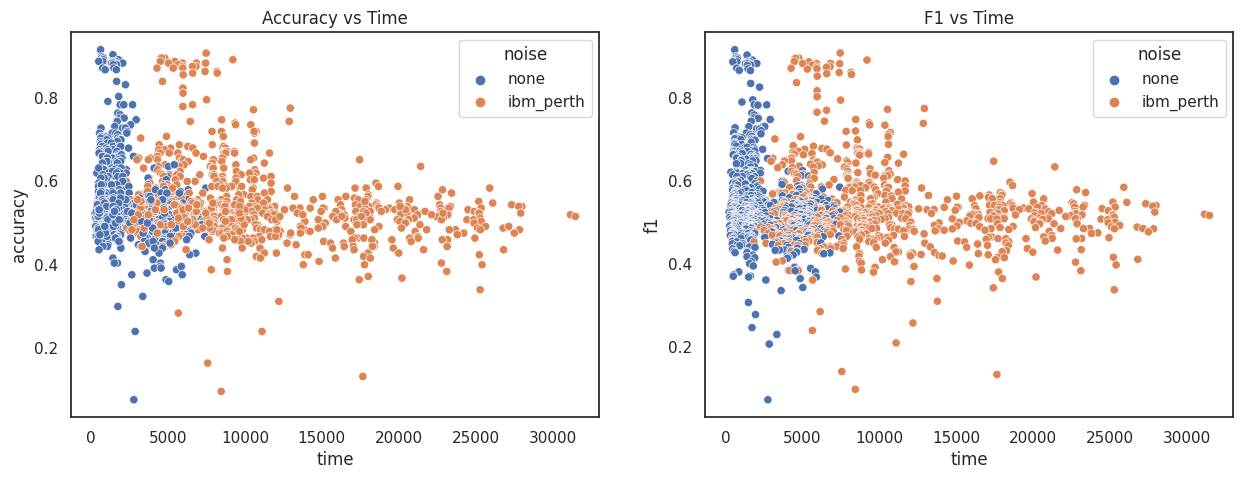

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res, x='time', y='accuracy', hue='noise', ax=ax[0])
sns.scatterplot(data=res, x='time', y='f1', hue='noise', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

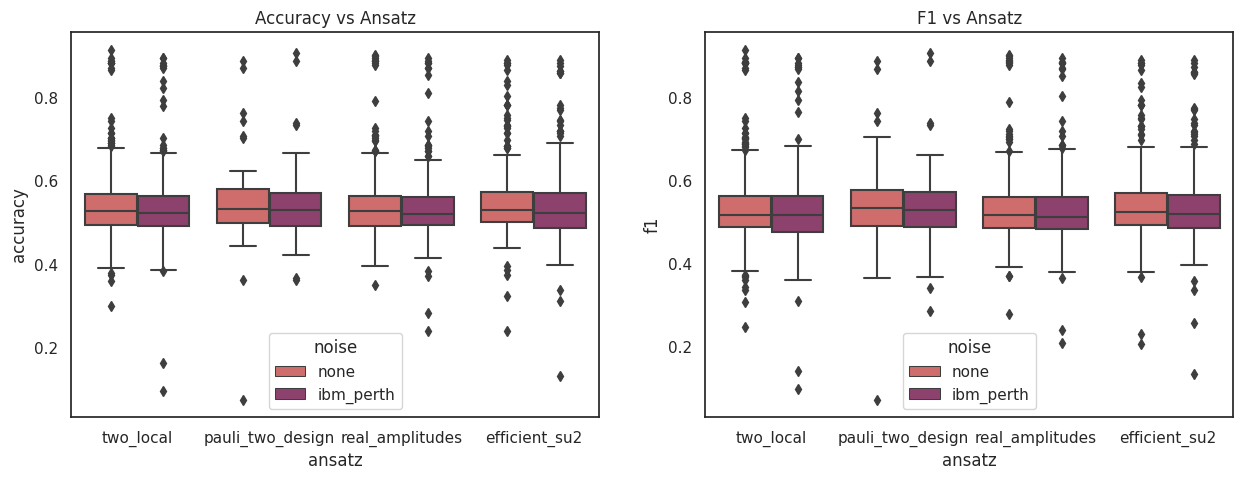

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res, x='ansatz', y='accuracy', hue='noise', palette='flare', ax=ax[0])
sns.boxplot(data=res, x='ansatz', y='f1', hue='noise', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

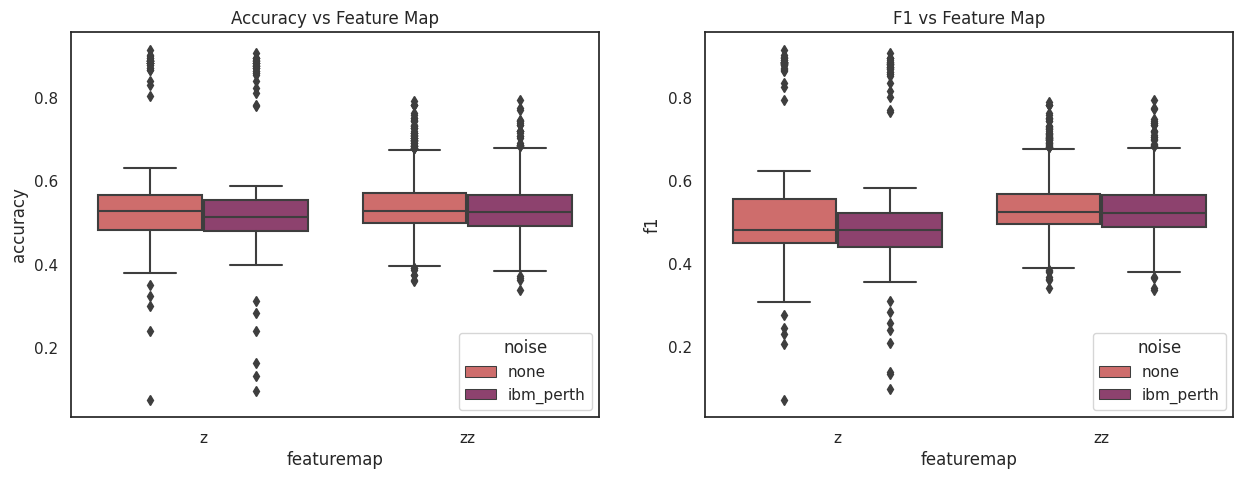

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='noise', palette='flare', ax=ax[0])
sns.boxplot(data=res, x='featuremap', y='f1', hue='noise', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

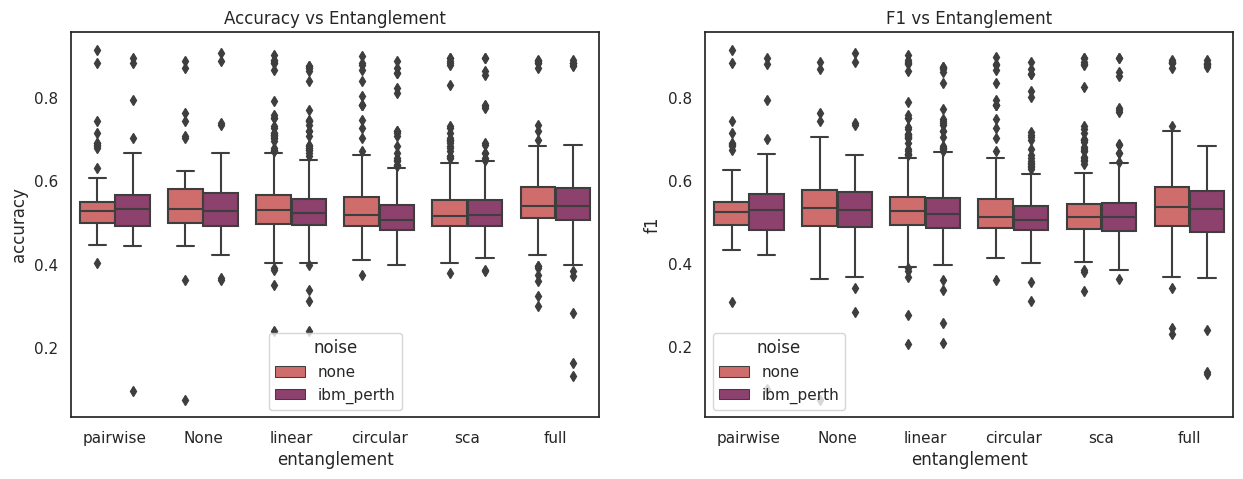

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='noise', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='noise', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

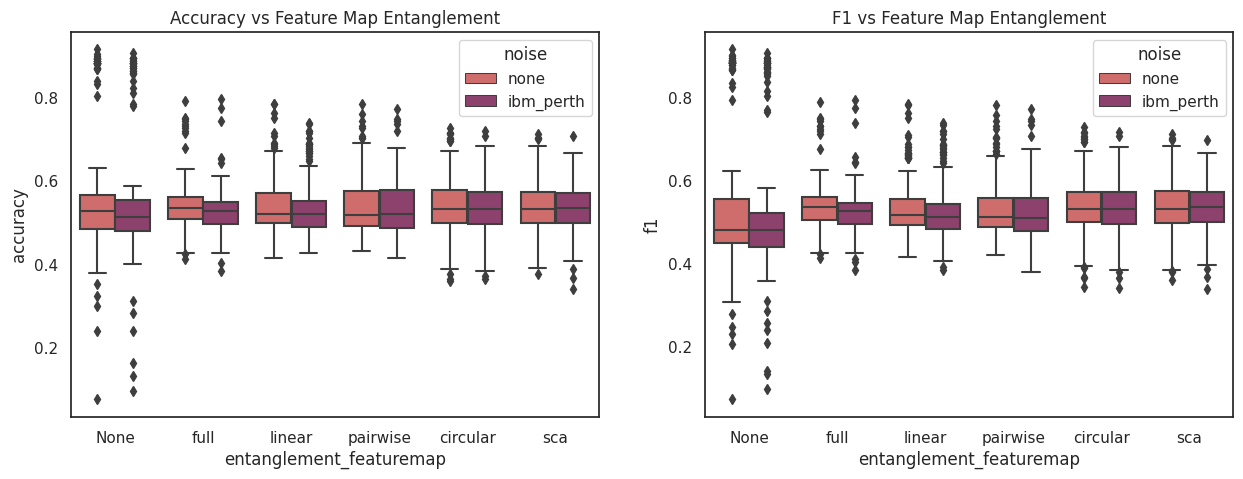

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='noise', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='noise', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


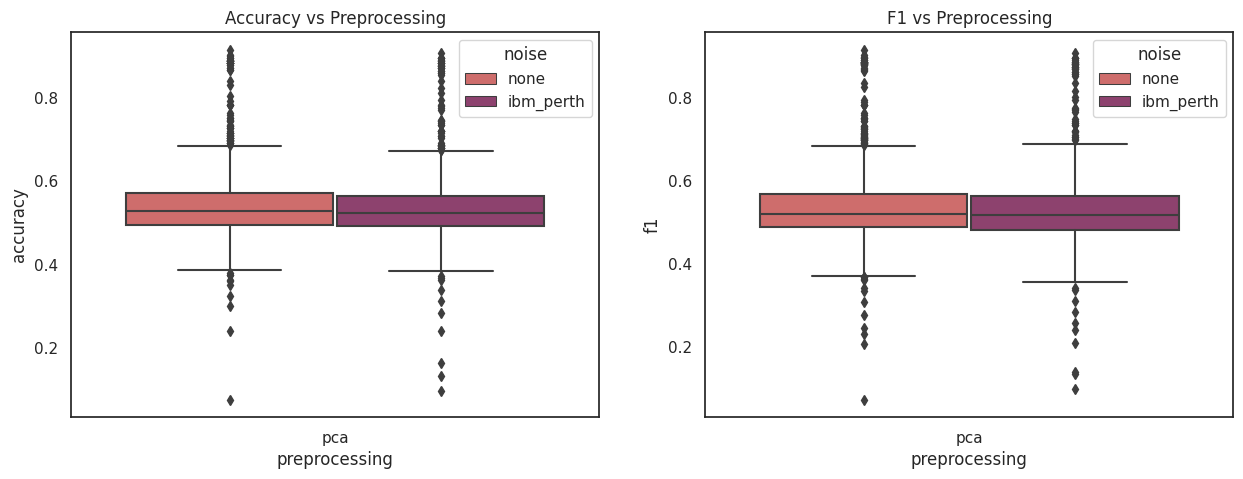

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res, x='preprocessing', y='accuracy', hue='noise', palette='flare', ax=ax[0])
sns.boxplot(data=res, x='preprocessing', y='f1', hue='noise', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

## Analyze Differences

In [90]:
diff.name = 'difference'
d = diff.reset_index()

In [91]:
diff

ansatz         featuremap  entanglement  entanglement_featuremap  preprocessing  optimizer    initialization
efficient_su2  z           circular      NaN                      pca            cobyla       beta              0.056
                                                                                              normal            0.052
                                                                                              uniform           0.008
                                                                                 nelder_mead  beta              0.040
                                                                                              normal            0.000
                                                                                                                ...  
two_local      zz          sca           sca                      pca            nelder_mead  normal            0.008
                                                                 

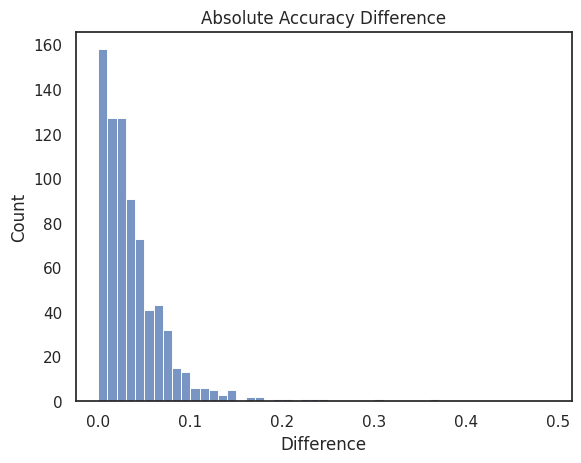

In [92]:
sns.histplot(d['difference'],bins=np.arange(0, 0.5, 0.01))
plt.title('Absolute Accuracy Difference')
plt.xlabel('Difference')
plt.ylabel('Count')
# plt.savefig("../reports/figures/kdd_absolute_differences.png", bbox_inches='tight')
plt.show()

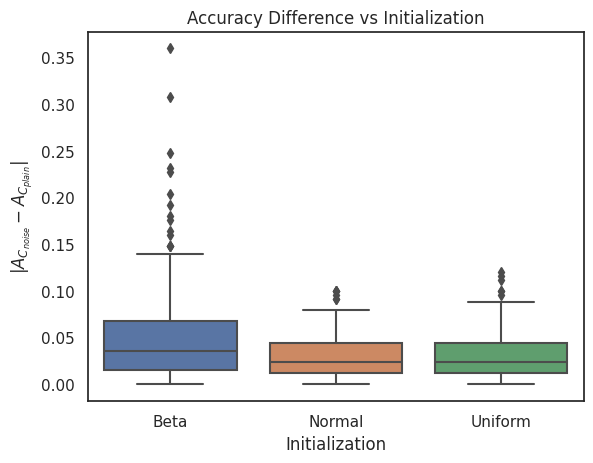

In [93]:
sns.boxplot(data=d, x='initialization', y='difference', palette='deep', order=['beta', 'normal', 'uniform'])
plt.title('Accuracy Difference vs Initialization')
plt.ylabel("$|A_{C_{noise}} - A_{C_{plain}}$|")
plt.xlabel("Initialization")
plt.xticks([0, 1, 2], ['Beta', 'Normal', 'Uniform'])
plt.savefig("../reports/figures/kdd_absolute_differences_initialization.png", bbox_inches='tight')
plt.show()


## Plot

In [94]:
d = diff.reset_index()
d

,ansatz,featuremap,entanglement,entanglement_featuremap,preprocessing,optimizer,initialization,difference
0,efficient_su2,z,circular,NaN,pca,cobyla,beta,0.056
1,efficient_su2,z,circular,NaN,pca,cobyla,normal,0.052
2,efficient_su2,z,circular,NaN,pca,cobyla,uniform,0.008
3,efficient_su2,z,circular,NaN,pca,nelder_mead,beta,0.040
4,efficient_su2,z,circular,NaN,pca,nelder_mead,normal,0.000
...,...,...,...,...,...,...,...,...
751,two_local,zz,sca,sca,pca,nelder_mead,normal,0.008
752,two_local,zz,sca,sca,pca,nelder_mead,uniform,0.028
753,two_local,zz,sca,sca,pca,spsa,beta,0.036
754,two_local,zz,sca,sca,pca,spsa,normal,0.044


In [95]:
diff.groupby(['initialization']).mean()

initialization
beta       0.050349
normal     0.028492
uniform    0.029587
Name: difference, dtype: float64